In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#from sklearn import svm
#from sklearn.svm import SVC

In [2]:
dfTrain = pd.read_csv("wine_train.csv")

In [3]:
dfTest = pd.read_csv("wine_test.csv")

In [4]:
dfTrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality level
0,7.6,0.30,0.22,10.2,0.049,57.0,191.0,0.99660,3.08,0.40,9.3,1
1,8.8,0.17,0.38,1.8,0.040,39.0,148.0,0.99420,3.16,0.67,10.2,1
2,7.2,0.32,0.40,8.7,0.038,45.0,154.0,0.99568,3.20,0.47,10.4,1
3,6.8,0.36,0.24,4.6,0.039,24.0,124.0,0.99090,3.27,0.34,12.6,2
4,6.8,0.67,0.30,13.0,0.290,22.0,193.0,0.99840,3.08,0.67,9.0,0


In [17]:
mycols = [col for col in dfTrain.columns]
mycols.remove('quality level')

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality level']

In [45]:
enc = OneHotEncoder(handle_unknown='ignore')

In [62]:
X = pd.DataFrame(data=dfTrain, columns=mycols)
y = np.array([[thing] for thing in dfTrain['quality level'].values])
Yenc = enc.fit([[0],[1],[2]])
Y = enc.transform(y).toarray()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [65]:
#Initialize the RF Classifier
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

#Define Parameter Grid to perform Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2']
}

#Initiate Grid Search
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

#Fit Model with Grid Search
CV_rfc.fit(X_train,y_train)

#Training Accuracy
print('RF - Best Params = ',CV_rfc.best_params_)
print('CV - 5 : Accuracy Score = ',CV_rfc.best_score_ )

#Test Accuracy
print('Test Set Accuracy = ', CV_rfc.score(X_test, y_test))

RF - Best Params =  {'max_features': 'sqrt', 'n_estimators': 200}
CV - 5 : Accuracy Score =  0.5538095238095238
Test Set Accuracy =  0.5777777777777777


In [204]:
rfc2 = RandomForestClassifier(n_estimators=200)

In [205]:
rfc2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [207]:
rfc2.score(X_test,y_test)

0.5977777777777777

In [206]:
rfc2.feature_importances_

array([0.07323496, 0.10274766, 0.08409627, 0.08665818, 0.09342893,
       0.08679782, 0.08695622, 0.10280304, 0.086308  , 0.07256303,
       0.1244059 ])

In [66]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [68]:
#SVM = make_pipeline(StandardScaler(), SVC(gamma='auto'))
#SVM.fit(X_train, y_train)

In [37]:
#SVM.score(X_test, y_test)

0.6111111111111112

In [36]:
#SVM.score(X_train, y_train)

0.6671428571428571

In [69]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [78]:
train_X = Variable(torch.Tensor(X_train.values).float())
test_X = Variable(torch.Tensor(X_test.values).float())
train_y = Variable(torch.Tensor(y_train).float())
test_y = Variable(torch.Tensor(y_test).float())

In [79]:
train_y

tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        ...,
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.]])

In [191]:
from sklearn.decomposition import PCA

In [192]:
pca = PCA()

In [198]:
pca.fit_transform(X_train)

array([[ 5.40939750e+01, -1.05438471e+01,  5.70187997e+00, ...,
        -1.24456248e-01, -3.59018989e-03, -1.59150137e-04],
       [-1.51370183e+01,  7.36005828e+00, -4.75714265e+00, ...,
        -8.99509631e-02,  7.40781906e-03, -3.77950484e-04],
       [ 1.72368269e+01, -4.12478217e+00,  2.05450640e-01, ...,
         4.34300311e-02, -7.80067612e-03,  5.28090772e-04],
       ...,
       [ 8.54169230e+01,  3.50639008e+00, -3.68108692e+00, ...,
        -7.02081885e-02, -1.47748704e-02,  6.50310604e-05],
       [ 1.76440381e+01,  2.06297928e+01,  1.89279770e-01, ...,
         4.11774510e-02,  1.55791410e-01,  9.47821208e-06],
       [ 5.44619630e+01, -1.34387733e+00,  5.21047077e+00, ...,
        -7.73474481e-02,  7.23698330e-03, -2.05311775e-04]])

In [219]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1732,7.4,0.19,0.31,14.5,0.045,39.0,193.0,0.99860,3.10,0.50,9.2
2440,6.4,0.16,0.44,1.2,0.051,39.0,122.0,0.99058,3.11,0.75,11.3
1232,8.1,0.33,0.36,7.4,0.037,36.0,156.0,0.99592,3.19,0.54,10.6
1081,7.0,0.32,0.27,7.1,0.027,37.0,122.0,0.99165,3.15,0.60,12.6
2920,9.2,0.22,0.40,2.4,0.054,18.0,151.0,0.99520,3.04,0.46,9.3
...,...,...,...,...,...,...,...,...,...,...,...
763,6.3,0.29,0.23,14.2,0.037,24.0,99.0,0.99528,3.08,0.38,10.6
835,7.3,0.26,0.30,9.3,0.050,35.0,154.0,0.99581,3.21,0.50,10.4
1653,6.7,0.25,0.23,7.2,0.038,61.0,220.0,0.99520,3.14,0.35,9.5
2607,6.3,0.29,0.30,8.1,0.212,60.0,150.0,0.99580,3.10,0.40,9.3


In [195]:
pca.singular_values_

array([1.98364511e+03, 5.71115689e+02, 2.09836775e+02, 4.74476724e+01,
       3.72869184e+01, 6.24773256e+00, 5.45876360e+00, 4.99747378e+00,
       4.03647921e+00, 9.28104955e-01, 2.05252945e-02])

In [228]:
class myNN(nn.Module):
    def __init__(self,input_size, hidden1_size, hidden2_size):
        super().__init__()
        self.fc1=nn.Linear(input_size,hidden1_size)
        #self.fc2=nn.Linear(hidden1_size, 3)
        self.fc2=nn.Linear(hidden1_size, hidden2_size)
        self.fc3=nn.Linear(hidden2_size, 3)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self,x):
        x = self.fc1(x)
        x = F.relu(x)
        #x = self.softmax(x)
        x = self.fc2(x)
        x = F.relu(x)
        #x = self.softmax(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

In [233]:
hidden1=10
hidden2=20
#net=myNN(input_size=len(mycols),hidden1_size=hidden1)
net=myNN(input_size=len(mycols),hidden1_size=hidden1,hidden2_size=hidden2)
criterion = nn.CrossEntropyLoss() #nn.NLLLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

In [234]:
losses=[]
for epoch in range(100):
    optimizer.zero_grad()
    out = net(train_X)
    #print(out.shape)
    #print(train_y.shape)
    loss = criterion(out, train_y)
    print("Loss: " + str(loss))
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

Loss: tensor(1.0881, grad_fn=<DivBackward1>)
Loss: tensor(1.0859, grad_fn=<DivBackward1>)
Loss: tensor(1.0817, grad_fn=<DivBackward1>)
Loss: tensor(1.0721, grad_fn=<DivBackward1>)
Loss: tensor(1.0562, grad_fn=<DivBackward1>)
Loss: tensor(1.0538, grad_fn=<DivBackward1>)
Loss: tensor(1.0530, grad_fn=<DivBackward1>)
Loss: tensor(1.0525, grad_fn=<DivBackward1>)
Loss: tensor(1.0532, grad_fn=<DivBackward1>)
Loss: tensor(1.0552, grad_fn=<DivBackward1>)
Loss: tensor(1.0597, grad_fn=<DivBackward1>)
Loss: tensor(1.0548, grad_fn=<DivBackward1>)
Loss: tensor(1.0585, grad_fn=<DivBackward1>)
Loss: tensor(1.0545, grad_fn=<DivBackward1>)
Loss: tensor(1.0574, grad_fn=<DivBackward1>)
Loss: tensor(1.0542, grad_fn=<DivBackward1>)
Loss: tensor(1.0561, grad_fn=<DivBackward1>)
Loss: tensor(1.0542, grad_fn=<DivBackward1>)
Loss: tensor(1.0559, grad_fn=<DivBackward1>)
Loss: tensor(1.0540, grad_fn=<DivBackward1>)
Loss: tensor(1.0552, grad_fn=<DivBackward1>)
Loss: tensor(1.0537, grad_fn=<DivBackward1>)
Loss: tens

In [235]:
y_preds = net(test_X)

In [236]:
y_preds

tensor([[0.2200, 0.7356, 0.0444],
        [0.2870, 0.6344, 0.0786],
        [0.3232, 0.6579, 0.0190],
        ...,
        [0.1834, 0.7730, 0.0436],
        [0.2968, 0.5673, 0.1359],
        [0.2012, 0.7872, 0.0115]], grad_fn=<SoftmaxBackward0>)

In [237]:
[thing for thing in y_preds]

[tensor([0.2200, 0.7356, 0.0444], grad_fn=<UnbindBackward0>),
 tensor([0.2870, 0.6344, 0.0786], grad_fn=<UnbindBackward0>),
 tensor([0.3232, 0.6579, 0.0190], grad_fn=<UnbindBackward0>),
 tensor([0.1998, 0.7727, 0.0275], grad_fn=<UnbindBackward0>),
 tensor([0.1518, 0.8260, 0.0222], grad_fn=<UnbindBackward0>),
 tensor([0.3371, 0.6445, 0.0184], grad_fn=<UnbindBackward0>),
 tensor([0.2000, 0.7359, 0.0641], grad_fn=<UnbindBackward0>),
 tensor([0.3578, 0.6404, 0.0018], grad_fn=<UnbindBackward0>),
 tensor([0.3271, 0.6617, 0.0112], grad_fn=<UnbindBackward0>),
 tensor([0.2753, 0.7034, 0.0213], grad_fn=<UnbindBackward0>),
 tensor([0.3130, 0.6550, 0.0319], grad_fn=<UnbindBackward0>),
 tensor([0.2076, 0.7844, 0.0080], grad_fn=<UnbindBackward0>),
 tensor([0.2365, 0.7071, 0.0564], grad_fn=<UnbindBackward0>),
 tensor([0.4151, 0.5625, 0.0224], grad_fn=<UnbindBackward0>),
 tensor([0.1458, 0.8373, 0.0169], grad_fn=<UnbindBackward0>),
 tensor([0.2101, 0.7557, 0.0342], grad_fn=<UnbindBackward0>),
 tensor(

In [187]:
test_y

tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])

In [188]:
accuracy_score(test_y,Variable(y_preds))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

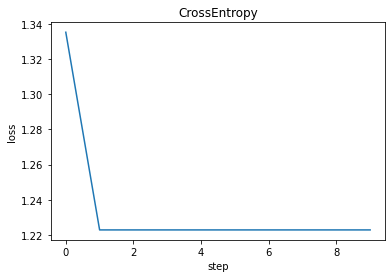

In [91]:
plt.title("CrossEntropy")
plt.xlabel("step")
plt.ylabel("loss")
#print('number of epoch', epoch, 'loss', loss.data)
#predict_out = myNN(train_X)
#_, predict_y = torch.max(predict_out, 1)
#print("Train Accuracy:",accuracy_score(train_y.data, predict_y.data))
#predict_out = net(test_X)
#_, predict_y = torch.max(predict_out, 1)
#print("Test Accuracy:",accuracy_score(test_y.data, predict_y.data))
plt.plot(losses)